## Multiple Linear Regression


### Importing Needed packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Downloading Data

In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/mahdi/.wget-hsts'. HSTS will be disabled.
--2023-06-22 12:27:19--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  46.5KB/s    in 1.5s    

2023-06-22 12:27:29 (46.5 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



### Reading the data with pandas
- taking a look at the dataset and analyzing data

In [4]:
df = pd.read_csv("FuelConsumption.csv")

df.head() #View the beginning of the data
#tail is used for Viewing the end of the data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Exploration

In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### A more concise view of the data

In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267
9,2.4,4,10.6,7.5,9.2,212


### data histogram

- For example, if the cylinder value be 4, There are 400 data in the dataset, whose cylinder is equal to 4

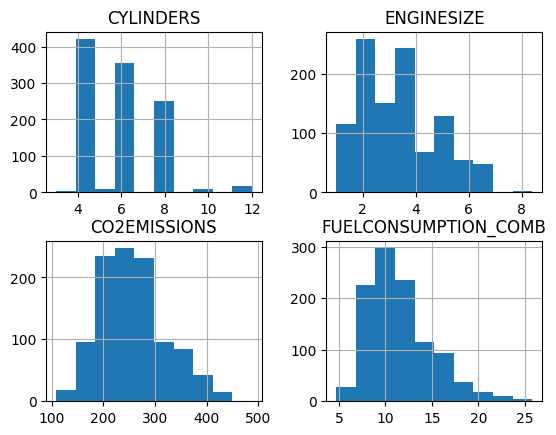

In [7]:
df_hist = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
df_hist.hist()
plt.show()

### drawing plot and scatter

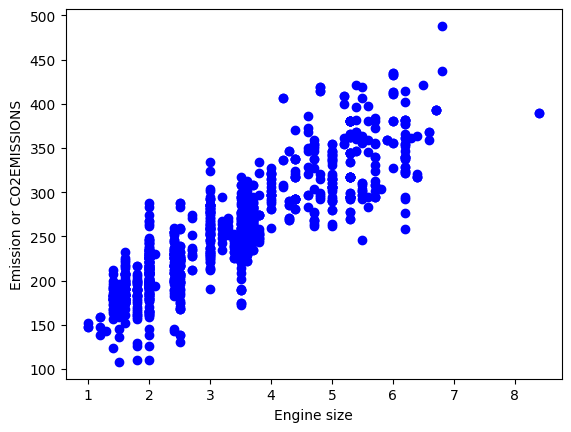

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission or CO2EMISSIONS")
plt.show()

### Creating train and test dataset
#### 20 % for test and 80 for train

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### drawing plot and scatter train and test

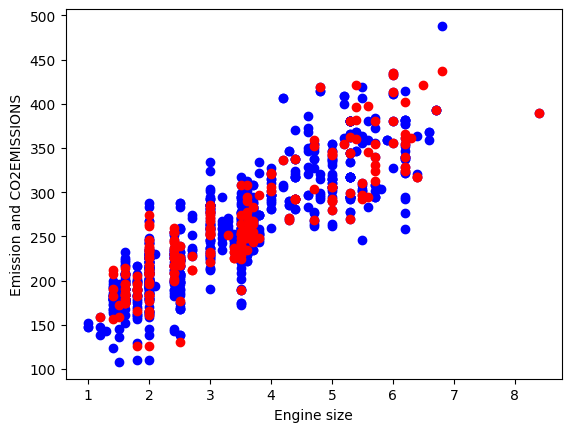

In [20]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
ax.scatter(test.ENGINESIZE, test.CO2EMISSIONS,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission and CO2EMISSIONS")
plt.show()

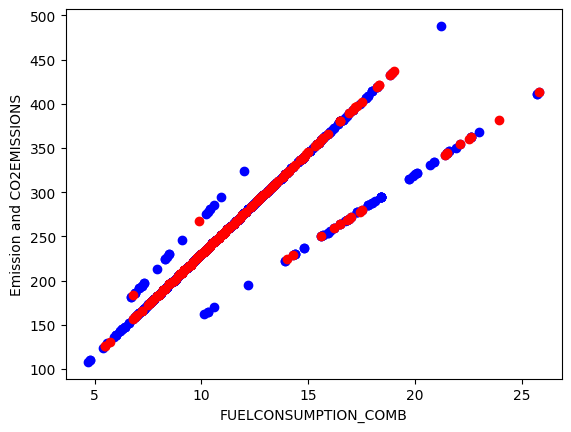

In [12]:
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
ax.scatter(test.FUELCONSUMPTION_COMB, test.CO2EMISSIONS,  color='red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission and CO2EMISSIONS")
plt.show()

### training model

- Converting the data into a normal array So that it is suitable for the model format

- [link regr](https://scikit-learn.org/stable/supervised_learning.html)

In [13]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

#asanyarray: converting to normal array 
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#train_x , train_y data are fitted with together and the best line is obtained and it will be final model
regr.fit (train_x, train_y)

# The coefficients
print('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9.43960138 8.47061409 9.6724106 ]]
Intercept:  [63.39179157]


In [102]:
print(regr.coef_[0][0])
print(regr.coef_[0][1])
print(regr.coef_[0][2])

9.439601383877905
8.470614092235174
9.672410597719395


### model Evaluation

In [46]:
from sklearn.metrics import r2_score


test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
predict = regr.predict(test_x) #y_hat

print("Mean absolute error: %.2f" % np.mean(np.absolute(predict - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predict - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , predict) )


Mean absolute error: 16.90
Residual sum of squares (MSE): 542.62
R2-score: 0.88


### visual

In [88]:
test_x[0].ravel()

array([ 3.5,  6. , 10.1])

<AxesSubplot: >

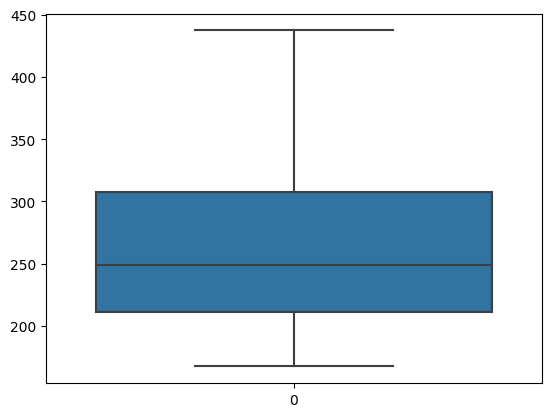

In [92]:
import seaborn as sns

sns.boxplot(predict)